In [1]:
import numpy as np
from matplotlib import pyplot as plt

X = np.array([4,6,8,10]).T
y = np.array([2.3,4.1,5.7,6.9]).T

X = np.c_[np.ones((X.shape[0])),X]     # prepend a column of ones as the first column

theta = np.array([-0.7,0.2]).T        # start with this theta

costHistory = []

In [2]:
theta0_path = [theta[0]]
theta1_path = [theta[1]]
print(theta0_path,theta1_path)

[-0.7] [0.2]


Now we perform batch gradient descent

In [3]:
alpha = 0.03; epochs = 2000

for epoch in np.arange(0,epochs):
    # shuffle the samples, I use a permutation of 1..n
    arr = np.arange(X.shape[0])
    np.random.shuffle(arr)
    # print(arr)
    for sample in np.arange(0,X.shape[0]):
        i = arr[sample]
        # print(i,X[i],y[i])
        preds_i = X[i].dot(theta)
        # print(preds_i)
        error_i = preds_i - y[i]
        # print(error_i)
        grad_i = X[i].dot(error_i)/X.shape[0]
        # print(grad_i)
        theta = theta - alpha*grad_i
        theta0_path.append(theta[0])
        theta1_path.append(theta[1])
    
# print(theta0_path,theta1_path)
print(theta)

[-0.60356332  0.75503914]


As we notice, this is approximately the same result as with the normal equations.

We will now draw path of theta in the contourplot

In [4]:
def parallel_cost(X,Y,x_data,y_data):
    m = X.shape[0]; n = X.shape[1]
    tot = np.zeros((m,n))
    for i in range(1,len(x_data)):
        tot += (X + Y*x_data[i] - y_data[i]) ** 2;
    return tot/(2*len(x_data))

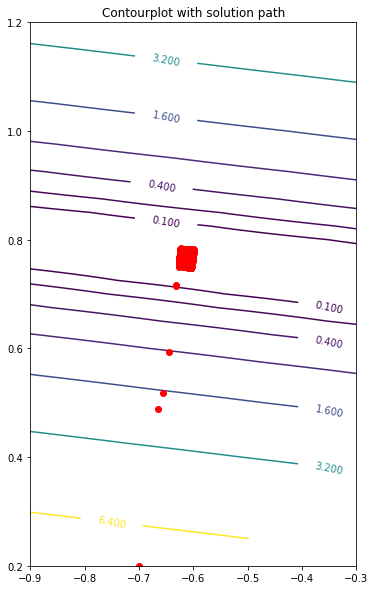

In [5]:
import matplotlib

delta = 0.025
x1 = np.arange(-1.0,0.0,delta)
y1 = np.arange(0.25,1.25,delta)
X1, Y1 = np.meshgrid(x1, y1)
Z1 = parallel_cost(X1,Y1,X[:,1],y)

# Create a simple contour plot
plt.figure(figsize=(6,10))
CS = plt.contour(X1,Y1,Z1,levels = [0.1,0.2,0.4,0.8,1.6,3.2,6.4])
plt.clabel(CS, inline=1, fontsize=10)
plt.plot(theta0_path, theta1_path, 'ro', linewidth=3)
plt.title('Contourplot with solution path')
plt.axis('scaled')
plt.axis([-0.9,-0.3,0.2,1.2])
plt.show()
#plt.savefig('figs/Contourplot_SGD_01.pdf', bbox_inches='tight')

Finally lets compute the absolute errors at the data points:

In [6]:
print(X.dot(theta)-y)

[ 0.11659322 -0.1733285  -0.26325023  0.04682804]
